In [42]:
from matplotlib import pyplot as plt

import jax
from jax import numpy as jnp
cos, sin, pi = jnp.cos, jnp.sin, jnp.pi

In [43]:
C = lambda x: 1/2 * (cos(x[0])**2 + sin(x[1]) ** 2)

In [44]:
xrange = jnp.linspace(-2*pi, 2*pi, 101)
yrange = jnp.linspace(-2*pi, 2*pi, 99)
xx, yy = jnp.meshgrid(xrange, yrange)
Z = C(jnp.array([xx, yy]))

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
c = ax.contourf(xx, yy, Z, levels=50, cmap='viridis')
plt.colorbar(c, label='Z value')
ax.set_aspect('equal')
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlim([-5*pi/2, 5*pi/2])
ax.set_ylim([-2*pi, 2*pi])
ax.set_zlim([0, 1])
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('C(x)')
ax.text2D(0.05, 0.95, "$C(x) = 1/2 \\left(\\cos(x_0)^2 + \\sin(x_1)^2 \\right)$", transform=ax.transAxes)

In [45]:
grad_C = lambda x: jnp.array([-cos(x[0]) * sin(x[0]), sin(x[1]) * cos(x[1])])
ad_C = jax.grad(C)
jnp.isclose(ad_C(jnp.array([1., 2.])), grad_C(jnp.array([1., 2.])), atol=1e-5)

Array([ True,  True], dtype=bool)

In [46]:
def gradient_descent(grad, x0, eta, n_iter=25, rtol=1e-3):
    x = x0
    trajectory = [x]
    for _ in range(n_iter):
        dx = -eta * grad(x)
        if jnp.linalg.norm(dx) < rtol:
            break
        x += dx
        trajectory.append(x)
    return jnp.array(trajectory)

In [47]:
x_hand = gradient_descent(grad_C, jnp.array([-6.0, 2.]), n_iter=100, eta=0.1)
x_ad = gradient_descent(ad_C, jnp.array([0.5, 0.1]), n_iter=10000, eta=1.0)
# assert jnp.allclose(x_hand, x_ad)

In [48]:
ad_C(jnp.array([0., 0.1]))

Array([0.        , 0.09933467], dtype=float32)

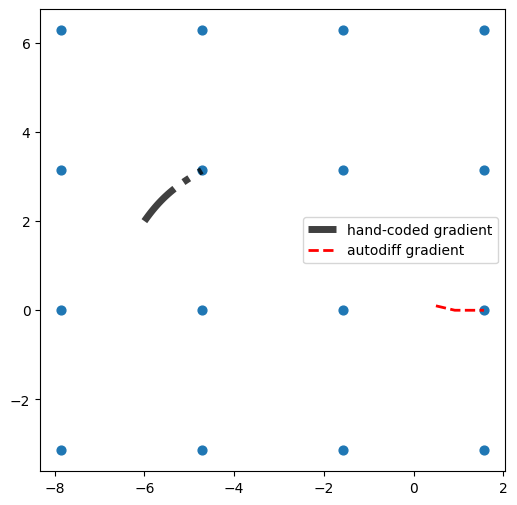

In [49]:
xrange = jnp.arange(-5*pi/2,3*pi/2,pi)
yrange = jnp.arange(-pi,3*pi,pi)
xx, yy = jnp.meshgrid(xrange, yrange)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(xx, yy, s=40)
ax.plot(x_hand[:,0], x_hand[:,1], '-.', color="black", label='hand-coded gradient', linewidth=5, alpha=0.75)
ax.plot(x_ad[:,0], x_ad[:,1], '--', label='autodiff gradient', color="red", linewidth=2)
ax.legend()

In [50]:
def gradient_ascent(grad, x0, eta, n_iter=25, rtol=1e-3):
    x = x0
    trajectory = [x]
    for _ in range(n_iter):
        dx = eta * grad(x) #positive eta for ascent
        if jnp.linalg.norm(dx) < rtol:
            break
        x += dx
        trajectory.append(x)
    return jnp.array(trajectory)

In [61]:
import random as rand

x_ascent_hand = gradient_ascent(grad_C, jnp.array([-6.0, 2.]), n_iter=100, eta=0.1)
x_ascent_ad = gradient_ascent(ad_C, jnp.array([0.5, 0.1]), n_iter=10000, eta=1.0)
x_ascent_rand = gradient_ascent(ad_C, jnp.array([rand.uniform(-7,7), rand.uniform(-6.2, 6.2)]), n_iter=10000, eta=1)
# assert jnp.allclose(x_hand, x_ad)

Text(0.5, 1.0, 'Gradient Ascent')

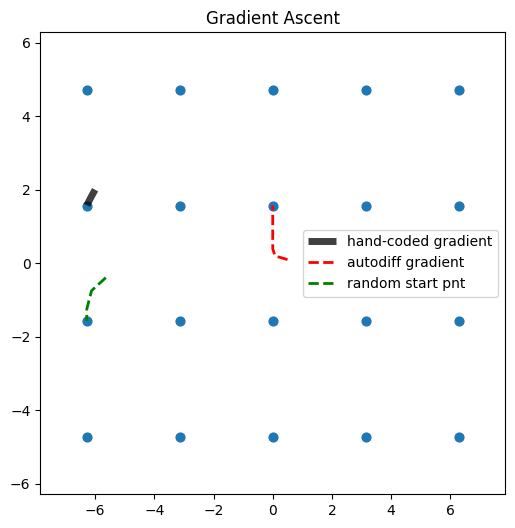

In [62]:
#Plot the local maxima and gradient acent from starting points

xrange = jnp.arange(-4*pi/2,6*pi/2,pi)
yrange = jnp.arange(-3*pi/2,5*pi/2,pi)
xx, yy = jnp.meshgrid(xrange, yrange)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(xx, yy, s=40)
ax.plot(x_ascent_hand[:,0], x_ascent_hand[:,1], '-.', color="black", label='hand-coded gradient', linewidth=5, alpha=0.75)
ax.plot(x_ascent_ad[:,0], x_ascent_ad[:,1], '--', label='autodiff gradient', color="red", linewidth=2)
ax.plot(x_ascent_rand[:,0], x_ascent_rand[:,1], '--', label='random start pnt', color="green", linewidth=2)
ax.set_xlim(-5*pi/2,5*pi/2)
ax.set_ylim(-2*pi, 2*pi)
ax.legend()
ax.set_title("Gradient Ascent")